# Naïve Bayes Classifier

## Import the necessary libraires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Read the data

In [2]:
data = pd.read_csv('tink.csv')
data.head()

,CLASS,CONTENT
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,INTP,'Good one _____ https://www.youtube.com/wat...
2,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
3,INTJ,'18/37 @.@|||Science is not perfect. No scien...
4,INFJ,"'No, I can't draw on my own nails (haha). Thos..."


In [3]:
data['CLASS'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
Name: CLASS, dtype: int64

## Define the inputs and the target

In [4]:
inputs = data['CONTENT']
target = data['CLASS']

## Transform the text from the data using CountVectorizer

In [5]:
vectorizer= CountVectorizer()
X = vectorizer.fit_transform(inputs)

## Split the transformed data into training and tesitng

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=365, stratify=target)

## Create a Naïve Bayes model

In [15]:
# Create a Multinomial Naïve Bayes classifier
naive_bayes_classifier = MultinomialNB()

In [16]:
# Fit the Naïve Bayes model to the training data
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

## Make predictions on the test data

In [17]:
# Create a variable with all predictions from the test set
y_pred = naive_bayes_classifier.predict(X_test)

## Create a confusion matrix

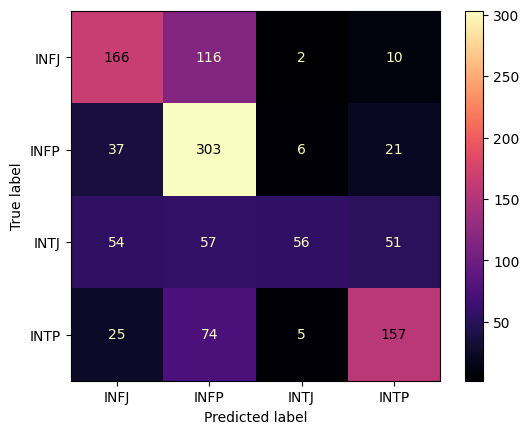

In [18]:
# Create a confusion matrix display based on the predicted labels y_test_pred and the true labels y_test.
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=naive_bayes_classifier.classes_, cmap='magma')
plt.show()

## Print a classification report

In [19]:
# Display the classification report of the model
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

        INFJ       0.59      0.56      0.58       294
        INFP       0.55      0.83      0.66       367
        INTJ       0.81      0.26      0.39       218
        INTP       0.66      0.60      0.63       261

    accuracy                           0.60      1140
   macro avg       0.65      0.56      0.56      1140
weighted avg       0.63      0.60      0.58      1140

